<h3>The Machine Learning Landscape</h3>

Modeling life satisfaction as a linear function of GDP per capita

life_satisfaction = $\theta_{0} + \theta_{1}$ x GDP_per_capita

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# load life satisfaction data
oecd_bli = pd.read_csv('~/Desktop/ML/oecd_bli_2015.csv')
gdp_per_capita = pd.read_csv('~/Desktop/ML/gdp.csv')

In [49]:
# function to join the bli and gdp datasets
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita = gdp_per_capita[gdp_per_capita["TIME"]==2015]
    gdp_per_capita.rename(columns={"Value": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [50]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [51]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Chile,22603.76841,6.7
Russia,24085.31286,6.0
Turkey,25855.91268,5.6
Poland,26534.72321,5.8
Hungary,26777.47051,4.9


In [52]:
# prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

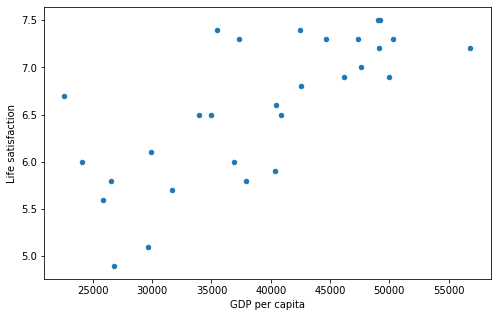

In [53]:
# visualize the data on a scatter plot
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(8,5))

In [54]:
country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       56831.65482
Life satisfaction        7.20000
Name: United States, dtype: float64

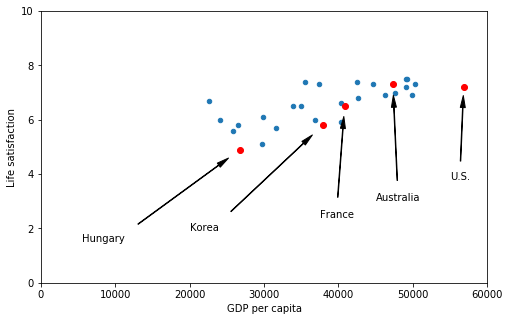

In [55]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5500, 1.5),
    "Korea": (20000, 1.9),
    "France": (37500, 2.4),
    "Australia": (45000, 3.0),
    "United States": (55000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = country_stats.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.show()

In [56]:
country_stats.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,26777.47051,4.9
Korea,37902.36101,5.8
France,40829.89332,6.5
Australia,47317.25071,7.3
United States,56831.65482,7.2


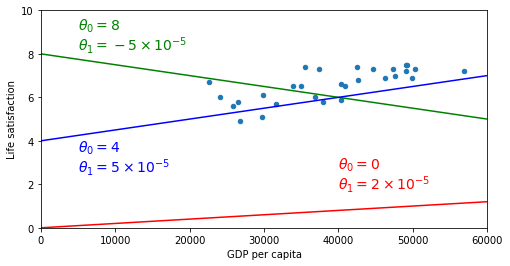

In [57]:
# plot the data with some potential model parameters
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,4))
plt.axis([0, 60000, 0, 10])
X_=np.linspace(0, 60000, 1000)
plt.plot(X_, 2*X_/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X_, 8 - 5*X_/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X_, 4 + 5*X_/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

In [58]:
# train a linear model on the data
model = sklearn.linear_model.LinearRegression()

model.fit(X, y)

cyprus_gdp_per_capita = 22587
X_new = [[cyprus_gdp_per_capita]]
cyprus_predicted_life_satisfaction = model.predict(X_new)
cyprus_predicted_life_satisfaction

array([[5.61895968]])

In [59]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

# make a prediction for the new data
print(f"t0: {t0}\nt1: {t1}")
print("Prediction:", t0 + t1 * X_new[0][0])

t0: 4.300635116130357
t1: 5.8366518779255174e-05
Prediction: 5.618959675797393


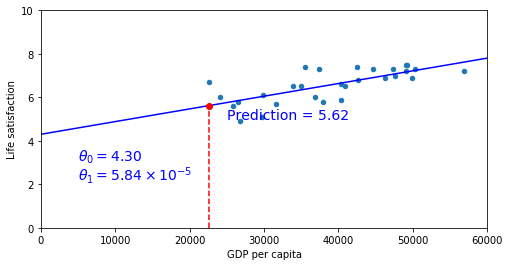

In [60]:
# plot the data with the linear prediction
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,4))
plt.axis([0, 60000, 0, 10])
X_=np.linspace(0, 60000, 1000)
plt.plot(X_, t0 + t1*X_, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.30$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 5.84 \times 10^{-5}$", fontsize=14, color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.62", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

In [61]:
# use instance-based learning instead of model-based learning
import sklearn.neighbors
neighborsModel = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
neighborsModel.fit(X, y)

# overfit the training data by setting n_neighbors = 1
oneNeighborModel = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)
oneNeighborModel.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

Text(0.5, 1.0, 'One nearest neighbor')

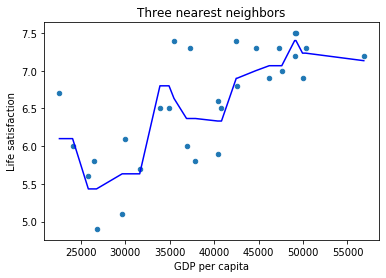

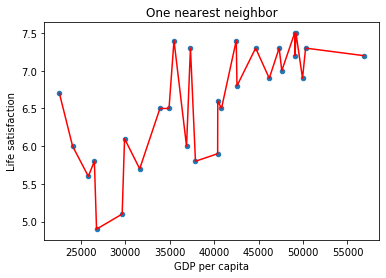

In [62]:
# plot the data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.plot(X, neighborsModel.predict(X), color='blue')
plt.title("Three nearest neighbors")

country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.plot(X, oneNeighborModel.predict(X), color='red')
plt.title("One nearest neighbor")

In [64]:
neighborsModel.predict(X_new)

array([[6.1]])